# Regularized Linear Regression

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [32]:
# surpress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import the the Boston housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

#### Features (X)
CRIM: Per capita crime rate by town  
ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS: Proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: Nitric oxides concentration (parts per 10 million)  
RM: Average number of rooms per dwelling  
AGE: Proportion of owner-occupied units built prior to 1940  
DIS: Weighted distances to five Boston employment centers  
RAD: Index of accessibility to radial highways  
TAX: Full-value property-tax rate per \$10,000  
PTRATIO: Pupil-teacher ratio by town  
B: $1000(Bk-0.63)^2$ where Bk is the proportion of blacks by town  
LSTAT: Percentage of the lower status of the population  

#### Target (y)
MEDV: Median value of owner-occupied homes in $1000's

In [5]:
display(pd.DataFrame(X).head(5))
display(y[:5])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


array([24. , 21.6, 34.7, 33.4, 36.2])

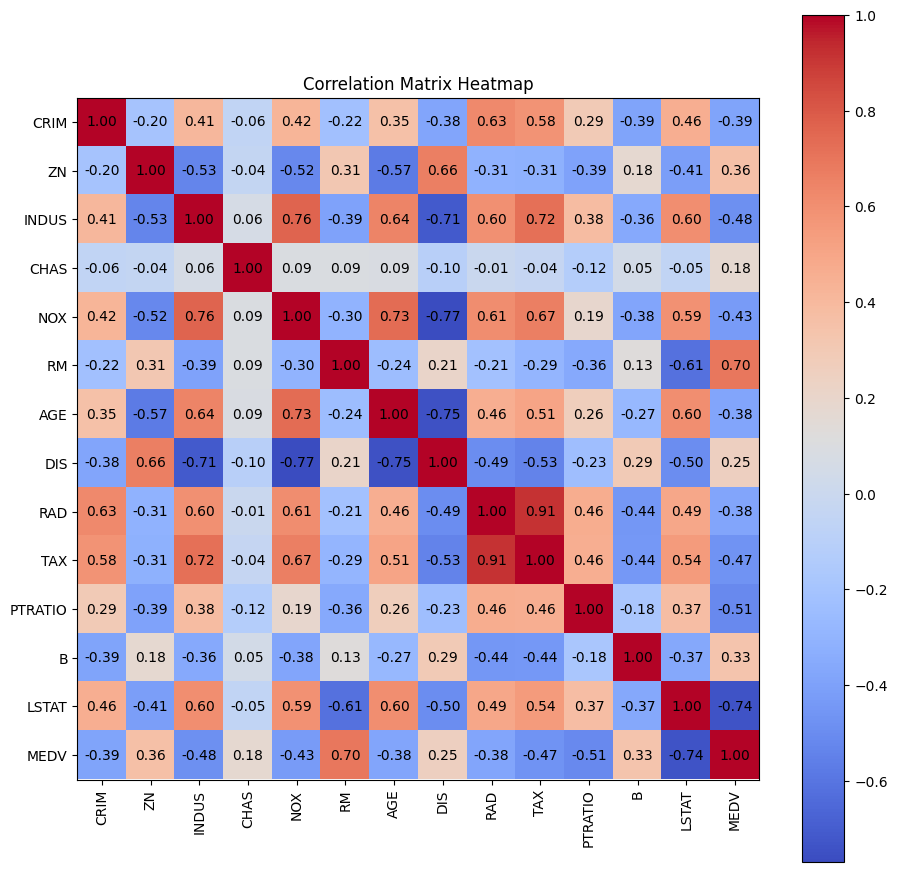

In [6]:
# display correlation matrix
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(X, columns=features)
df["MEDV"] = y

correlation_matrix = df.corr()

plt.figure(figsize=(11, 11))
plt.imshow(correlation_matrix, cmap="coolwarm")
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='black')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90) 
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns) 
plt.title('Correlation Matrix Heatmap')
plt.show()

In [5]:
# train-test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Lasso Regression (L1)
$
J = MSE + \text{Regularization Term} \\
J = \frac{1}{2N}\sum_{i=1}^{N}\left( y_i - y_{i}^{pred}\right)^2 + \alpha\sum_{j=1}^{p}\left| \beta_j \right|
$   
where,
- $J$: cost function
- $N$: number of samples
- $y_i$: actual target values
- $y_i^{pred}$: Predicted target value
- $\beta_j$: coeficients in the linear equation
- $\alpha$: regularization prameter
- $p$: number of features ($X$)

In [6]:
# initialize the lasss regression model
lasso_reg = Lasso(alpha=0.1)

In [7]:
# train the model for the training dataset
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [8]:
# get the coefficients trained linear reggression model
print(lasso_reg.coef_)

[-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


In [9]:
# get the prediction for the testing dataset from the trained model.
y_pred = lasso_reg.predict(X_test)

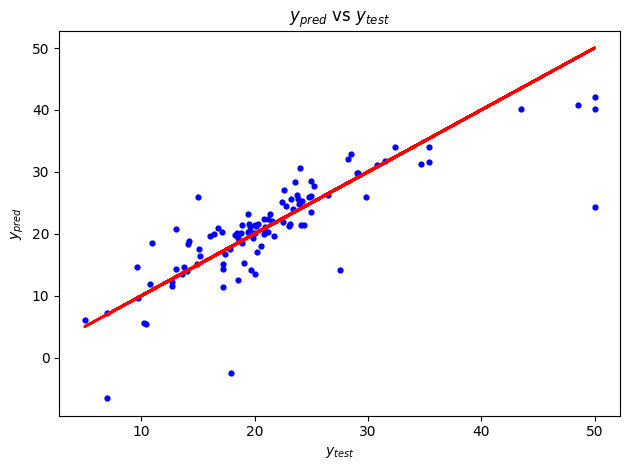

In [10]:
# plot the prediction against the target values of testing data set
plt.figure()
plt.scatter(y_test, y_pred, color="blue", s=12)
plt.plot(y_test, y_test, color="red", linewidth=2)
plt.title("$y_{pred}$ vs $y_{test}$")
plt.xlabel("$y_{test}$")
plt.ylabel("$y_{pred}$")
plt.tight_layout()
plt.show()

In [11]:
# evaluate the accuracy of the predictions
mae = mean_squared_error(y_test, y_pred)
print("MSE =", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared =", r2)

MSE = 25.15559375393417
R-squared = 0.6569712802223937


Let's do hyperparameter tunning for the lasso regression, with differet $\alpha$ values.

In [19]:
# define the hyperparameter which need to be tunned
alpha_arr = np.arange(0, 5.1, 0.1)
params = {
    'alpha': alpha_arr
}

In [20]:
print(X.shape)
lasso_grid_search = GridSearchCV(Lasso(), params, cv=5)
lasso_grid_search.fit(X_train, y_train)

(506, 13)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

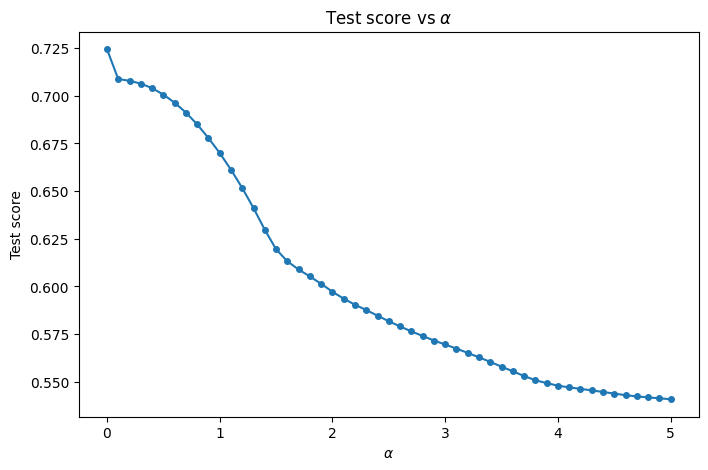

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(alpha_arr, lasso_grid_search.cv_results_["mean_test_score"], marker="o", markersize=4)
plt.xlabel(r"$\alpha$")
plt.ylabel("Test score")
plt.title(r"Test score vs $\alpha$")
plt.show()

In [22]:
best_params = lasso_grid_search.best_params_
best_estimator = lasso_grid_search.best_estimator_

# print the best hyperparameters
print("Best parmeters:", best_params)

# evaluate the accuracy of the predictions with best parameters
mae = mean_squared_error(y_test, best_estimator.predict(X_test))
print("MSE =", mae)
r2 = r2_score(y_test, best_estimator.predict(X_test))
print("R-squared =", r2)

Best parmeters: {'alpha': 0.0}
MSE = 24.291119474973527
R-squared = 0.6687594935356318


## Ridge Regression (L2)
$
J = MSE + \text{Regularization Term} \\
J = \frac{1}{2N}\sum_{i=1}^{N}\left( y_i - y_{i}^{pred}\right)^2 + \alpha\sum_{j=1}^{p}\beta_j^2
$   
where,
- $J$: cost function
- $N$: number of samples
- $y_i$: actual target values
- $y_i^{pred}$: Predicted target value
- $\beta_j$: coeficients in the linear equation
- $\alpha$: regularization prameter
- $p$: number of features ($X$)

In [6]:
# initialize the ridge regression model
ridge_reg = Ridge(alpha=0.1)

In [7]:
# train the model for the training dataset
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [8]:
# get the coefficients trained linear reggression model
print(ridge_reg.coef_)

[-1.12399694e-01  3.04593914e-02  3.48958400e-02  2.75033318e+00
 -1.59244585e+01  4.44577949e+00 -7.30474388e-03 -1.42960751e+00
  2.60042840e-01 -1.07802286e-02 -9.00771040e-01  1.24004789e-02
 -5.10902332e-01]


In [9]:
# get the prediction for the testing dataset from the trained model.
y_pred = ridge_reg.predict(X_test)

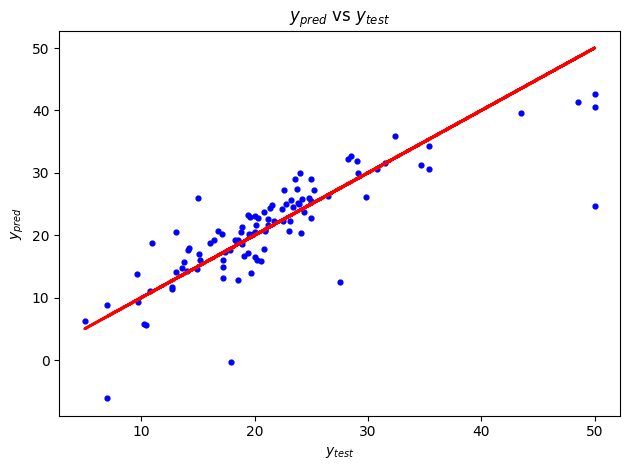

In [10]:
# plot the prediction against the target values of testing data set
plt.figure()
plt.scatter(y_test, y_pred, color="blue", s=12)
plt.plot(y_test, y_test, color="red", linewidth=2)
plt.title("$y_{pred}$ vs $y_{test}$")
plt.xlabel("$y_{test}$")
plt.ylabel("$y_{pred}$")
plt.tight_layout()
plt.show()

In [11]:
# evaluate the accuracy of the predictions
mae = mean_squared_error(y_test, y_pred)
print("MSE =", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared =", r2)

MSE = 24.30102550019274
R-squared = 0.6686244122021412


Let's do hyperparameter tunning for the ridge regression, with differet $\alpha$ values and solvers.

In [12]:
# define the hyperparameter which need to be tunned
alpha_arr = np.arange(0, 5.1, 0.1)
params = {
    'alpha': alpha_arr,
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
}

In [13]:
print(X.shape)
ridge_grid_search = GridSearchCV(Ridge(), params, cv=5)
ridge_grid_search.fit(X_train, y_train)

(506, 13)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'saga']})

In [14]:
best_params = ridge_grid_search.best_params_
best_estimator = ridge_grid_search.best_estimator_

# print the best hyperparameters
print("Best parmeters:", best_params)

# evaluate the accuracy of the predictions with best parameters
mae = mean_squared_error(y_test, best_estimator.predict(X_test))
print("MSE =", mae)
r2 = r2_score(y_test, best_estimator.predict(X_test))
print("R-squared =", r2)

Best parmeters: {'alpha': 0.0, 'solver': 'svd'}
MSE = 24.291119474973424
R-squared = 0.6687594935356334


## Elastic Regression
$
J = MSE + \text{Regularization Term} \\
J = \frac{1}{2N}\sum_{i=1}^{N}\left( y_i - y_{i}^{pred}\right)^2 + \alpha \left[ \gamma\sum_{j=1}^{p}\left| \beta_j \right| + \frac{1}{2}(1-\gamma)\sum_{j=1}^{p}\beta_j^2 \right]
$   
where,
- $J$: cost function
- $N$: number of samples
- $y_i$: actual target values
- $y_i^{pred}$: Predicted target value
- $\beta_j$: coeficients in the linear equation
- $\alpha$: regularization prameter
- $\gamma$: Elastic net mixing parameter
- $p$: number of features ($X$)

In [6]:
# initialize the elastic regression model
elastic_reg = ElasticNet(alpha=0.2, l1_ratio=0.2)

In [7]:
# train the model for the training dataset
elastic_reg.fit(X_train, y_train)

ElasticNet(alpha=0.2, l1_ratio=0.2)

In [8]:
# get the coefficients trained linear reggression model
print(elastic_reg.coef_)

[-0.10916373  0.03915104 -0.04184112  0.57181201 -0.06179189  2.84069322
 -0.00321222 -1.14474427  0.28604475 -0.01430584 -0.80088631  0.01221336
 -0.66358643]


In [9]:
# get the prediction for the testing dataset from the trained model.
y_pred = elastic_reg.predict(X_test)

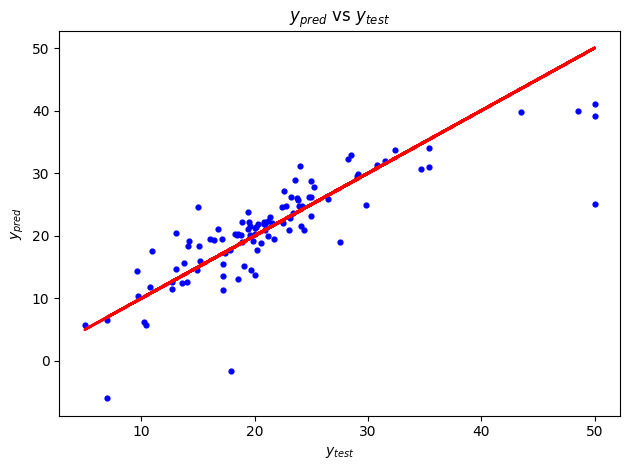

In [10]:
# plot the prediction against the target values of testing data set
plt.figure()
plt.scatter(y_test, y_pred, color="blue", s=12)
plt.plot(y_test, y_test, color="red", linewidth=2)
plt.title("$y_{pred}$ vs $y_{test}$")
plt.xlabel("$y_{test}$")
plt.ylabel("$y_{pred}$")
plt.tight_layout()
plt.show()

In [11]:
# evaluate the accuracy of the predictions
mae = mean_squared_error(y_test, y_pred)
print("MSE =", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared =", r2)

MSE = 23.70067730855687
R-squared = 0.6768109282355959


Let's do hyperparameter tunning for the elastic regression, with differet $\alpha$ values and $\gamma$ values.

In [15]:
# define the hyperparameter which need to be tunned
alpha_arr = np.arange(0, 5.1, 0.1)
gamma_arr = np.arange(0, 1.1, 0.1)
params = {
    'alpha': alpha_arr,
    'l1_ratio': gamma_arr
}

In [18]:
print(X.shape)
elastic_grid_search = GridSearchCV(ElasticNet(), params, cv=5)
elastic_grid_search.fit(X_train, y_train)

(506, 13)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [19]:
best_params = elastic_grid_search.best_params_
best_estimator = elastic_grid_search.best_estimator_

# print the best hyperparameters
print("Best parmeters:", best_params)

# evaluate the accuracy of the predictions with best parameters
mae = mean_squared_error(y_test, best_estimator.predict(X_test))
print("MSE =", mae)
r2 = r2_score(y_test, best_estimator.predict(X_test))
print("R-squared =", r2)

Best parmeters: {'alpha': 0.0, 'l1_ratio': 0.0}
MSE = 24.291119474973527
R-squared = 0.6687594935356318
